# Assignment 3
Compute the quadrature error of the following integrals

$I(f_1) = \int_{-1}^1 |x|^3 dx$

$I(f_2) = \int_{-1}^1 \frac{1}{1 + 25x^2} dx$

with (i) the composite trapezoidal rule, and (ii) the composite Simpson's rule. Make log-log plots of quadrature errors for both methods for $f_1$ and $f_2$, where the x-axis represents the number of quadrature nodes $n$ and y-axis represents the absolute error $|I(f) - Q_n(f)|$. You can use the exact integral value $I(f_2) = \frac{2}{5} tan^{-1}(5)$ for calculating the error. What convergence rate do you observe for each case?

In [1]:
import math

import matplotlib.pyplot as plt

## Define all composite functions
Note that composite Simpson's is only defined for even $n$. To handle this, we use Simpson's 3/8 rule for the last $3$ data points if $n$ is odd. This should not affect the error significantly.

In [2]:
def composite_trapezoidal(f, n, start_x = -1, end_x = 1) -> float:
    """Compute integral of f using the composite trapezoidal rule with n quadrature nodes
    
    Ref: https://en.wikipedia.org/wiki/Trapezoidal_rule
    """
    delta_x = (end_x - start_x) / n
    x = [start_x + delta_x * j for j in range(n + 1)]
    
    sum_ = 0
    for i in range(n):
        sum_ += (1/2) * (f(x[i]) + f(x[i+1])) * delta_x

    return sum_
    

In [3]:
def _composite_simpson_even(f, n, start_x = -1, end_x = 1) -> float:
    """Compute integral of f using the composite Simpson's rule with n quadrature nodes
    
    USED IF n IS EVEN
    """
    delta_x = (end_x - start_x) / n
    x = [start_x + delta_x * j for j in range(n + 1)]
    sum_ = 0
    for i in range(1, int(n/2)):
        sum_ += f(x[2*i - 2]) + 4*f(x[2*i - 1]) + f(x[2*i])
    
    return (delta_x / 3) * sum_
    


In [4]:
def _simpson_3_8(f, start_x, end_x) -> float:
    """Compute integral of f using Simpson's 3/8 rule
    
    THIS IS USED FOR THE LAST 3 DATA POINTS IF n IS ODD

    Ref: https://scicomp.stackexchange.com/a/25669
    """
    delta_x = (end_x - start_x) / 3
    x = [start_x + delta_x * j for j in range(4)]
    
    return (3 * delta_x / 8) * (f(x[0]) + 3 * f(x[1]) + 3*f(x[2]) + f(x[3]))

In [5]:
def composite_simpson(f, n, start_x = -1, end_x = 1) -> float:
    """Compute integral of f using the composite Simpson's rule with n quadrature nodes
    
    Ref: https://en.wikipedia.org/wiki/Simpson%27s_rule
    """
    
    if n % 2 == 0:
        # n is even -> use only Simpson's 1/3
        return _composite_simpson_even(f, n, start_x, end_x)
    else:
        # n is odd -> use Simpson's 1/3 for the first n - 4 points, then Simpson's
        # 3/8 for the last 3 points
        delta_x = (end_x - start_x) / n
        even_sum = _composite_simpson_even(f, n - 3, start_x, end_x - delta_x * 4)
        odd_sum = _simpson_3_8(f, end_x - delta_x * 3, end_x)
        return even_sum + odd_sum

## Define the functions
Define the functions $f_1$ and $f_2$

In [6]:
def f_1(x: float) -> float:
    return abs(x) ** 3

In [7]:
def f_2(x: float) -> float:
    return 1 / (1 + 25 * x**2)

## Compute errors and plot results

In [8]:
def get_error(calculated: float, actual: float) -> float:
    return abs(actual - calculated)

In [9]:
FIGSIZE = (10, 10)
MAX_N = 1000

### f_1

In [10]:
%%capture
# Compute actual integral by hand
integral = 1/2

# Start at n = 4
x_range = range(4, MAX_N + 1)
x_only_even = range(4, MAX_N + 1, 2)

# Compute composite integrals
f1_trapezoidal = [composite_trapezoidal(f_1, n) for n in x_range]
f1_simpsons = [composite_simpson(f_1, n) for n in x_range]
f1_simpsons_even = [composite_simpson(f_1, n) for n in x_only_even]

# Compute erros
f1_errors_trapezoidal = [get_error(trap, integral) for trap in f1_trapezoidal]
f1_errors_simpsons = [get_error(simp, integral) for simp in f1_simpsons]
f1_errors_simpsons_even = [get_error(simp, integral) for simp in f1_simpsons_even]

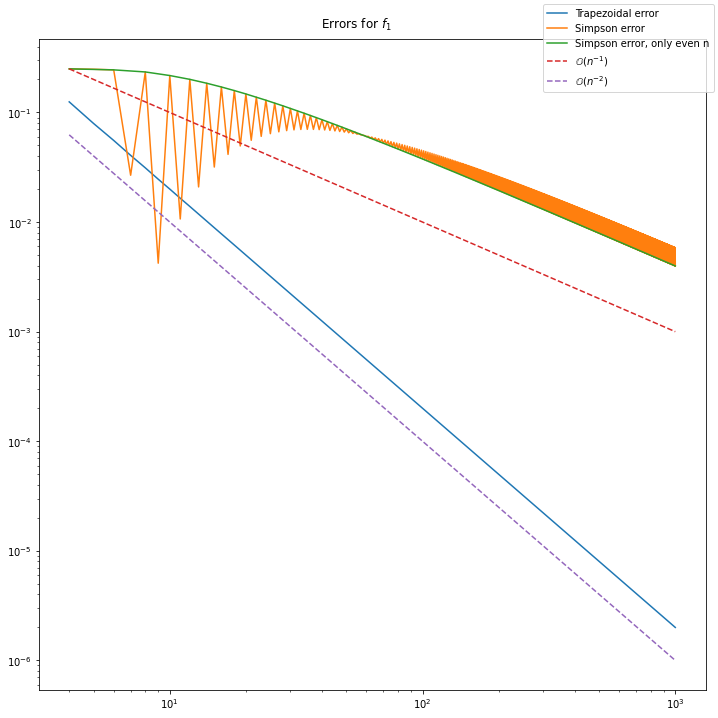

In [11]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

ax.loglog(x_range, f1_errors_trapezoidal, label="Trapezoidal error")
ax.loglog(x_range, f1_errors_simpsons, label="Simpson error")
ax.loglog(x_only_even, f1_errors_simpsons_even, label="Simpson error, only even n")
ax.plot(x_range, [x ** (-1) for x in x_range], "--", label=r"$\mathbb{O}(n^{-1})$")
ax.plot(x_range, [x ** (-2) for x in x_range], "--", label=r"$\mathbb{O}(n^{-2})$")

fig.legend()
fig.suptitle(r"Errors for $f_1$")

fig.tight_layout()
plt.show()

### f_2

In [12]:
%%capture
# Compute actual integral by hand
integral = (2/5) * math.atan(5)

# Start at n = 4
x_range = range(4, MAX_N + 1)
x_only_even = range(4, MAX_N + 1, 2)

# Compute composite integrals
f2_trapezoidal = [composite_trapezoidal(f_2, n) for n in x_range]
f2_simpsons = [composite_simpson(f_2, n) for n in x_range]
f2_simpsons_even = [composite_simpson(f_2, n) for n in x_only_even]

# Compute erros
f2_errors_trapezoidal = [get_error(trap, integral) for trap in f2_trapezoidal]
f2_errors_simpsons = [get_error(simp, integral) for simp in f2_simpsons]
f2_errors_simpsons_even = [get_error(simp, integral) for simp in f2_simpsons_even]

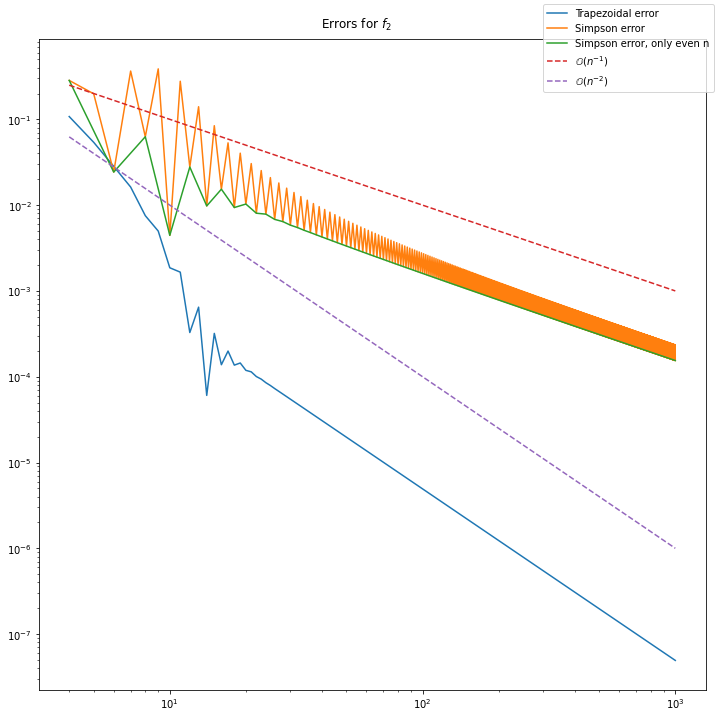

In [13]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

ax.loglog(x_range, f2_errors_trapezoidal, label="Trapezoidal error")
ax.loglog(x_range, f2_errors_simpsons, label="Simpson error")
ax.loglog(x_only_even, f2_errors_simpsons_even, label="Simpson error, only even n")
ax.plot(x_range, [x ** (-1) for x in x_range], "--", label=r"$\mathbb{O}(n^{-1})$")
ax.plot(x_range, [x ** (-2) for x in x_range], "--", label=r"$\mathbb{O}(n^{-2})$")


fig.legend()
fig.suptitle(r"Errors for $f_2$")

fig.tight_layout()
plt.show()

## Observations
The composite trapezoidal method is, in all cases for $f_1$ and with large enough $n$ for $f_2$, parallel  with $O(n^{-2})$. This indicates that the composite trapezoidal method has a second order convergence, or a quadratic rate of convergence. This agrees with (7.16) in Süli and Mayers (2003), where it is stated that the error for the composite trapezoidal method is given by $\mathbb{E}_1(f) \le \frac{(b-a)^3}{12n^2} \max_{\xi \in [a, b]} f''(\xi)$, i.e. $\mathbb{E}_1(f) = O(n^{-2})$

The Simpson's method, when using the above implemented method of using Simpson's 3/8-method for the last 3 data points if $n$ is odd, fluctuates wildly. While $\lim_{n \to \infty} simpsons(f, n)$ is likely to converge, there is a difference between the odd-handling and the even-only method for small enough $n$s, which I have to use due to computational limitations. Both are plotted in the above charts.

Still, Simpson's method has a lower rate of convergence than the trapezoidal method, falling more in line with $O(n^{-1})$, or a linear rate of convergence. Unlike for the composite trapezoidal method, this does not agree with Süli and Mayers(2003). In (7.18), they state that $\mathbb{E}_2(f) \le \frac{(b-a)^5}{2880n^4} \max_{\xi \in [a, b]} |f^{(4)}(\xi)|$, i.e. that we should have $\mathbb{E}_2(f) = O(n^{-4})$ instead of  $O(n^{-1})$. I have no explenation for why this is occuring, other than perhaps an error in the implementation that I cannot find.

Note the irregularities for small $n$ in $f_2$. This likely occurs due to $f_2$ having a "spike", meaning that the error of the composite methods depends heavily on getting the "correct" quadrature points. This is further strengthened by the irregularities going away once a high enough $n$ has been selected.
